Imports

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, losses
import matplotlib.pyplot as plt


Load mnist and reshape

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)


Create model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train

In [4]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.1484 - accuracy: 0.9527 - val_loss: 0.0447 - val_accuracy: 0.9857
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0467 - accuracy: 0.9859 - val_loss: 0.0318 - val_accuracy: 0.9893
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.0421 - val_accuracy: 0.9873
Epoch 4/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0257 - accuracy: 0.9922 - val_loss: 0.0370 - val_accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0419 - val_accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0171 - accuracy: 0.9943 - val_loss: 0.0353 - val_accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.0309 -

View results and training progression

1875/1875 - 17s - loss: 0.0037 - accuracy: 0.9988
Train stats: 0.003685874165967107 0.9988333582878113
313/313 - 2s - loss: 0.0340 - accuracy: 0.9915
Test stats: 0.033998582512140274 0.9915000200271606


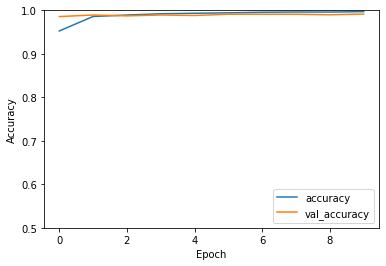

In [5]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

train_loss, train_acc = model.evaluate(x_train,  y_train, verbose=2)
print('Train stats:', train_loss, train_acc)

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('Test stats:', test_loss, test_acc)